In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
COIN_BLOCK_INFO_PATH = "coin_block_info"

coin = "SPD"
coin_per_block = 15
our_nethash = 20

fname = os.path.join(COIN_BLOCK_INFO_PATH, coin+"_block_info.csv")

In [3]:
df = pd.read_csv(fname)

In [4]:
df['date'] = pd.to_datetime(df['time'],unit='s')

In [5]:
print("Number of Blocks: {}".format(df.count()[0]))

Number of Blocks: 2000


In [6]:
print("Latest Block: {}".format(int(df["height"][0])))

Latest Block: 149533


In [7]:
df.head(5)

,difficulty,flags,height,nonce,time,date
0,81960.645777,proof-of-stake,149533.0,0.000000e+00,1.525614e+09,2018-05-06 13:40:32
1,74067.908806,proof-of-stake,149532.0,0.000000e+00,1.525614e+09,2018-05-06 13:40:00
2,66935.272501,proof-of-stake,149531.0,0.000000e+00,1.525614e+09,2018-05-06 13:38:56
3,5285.818250,proof-of-work,149530.0,3.639758e+09,1.525614e+09,2018-05-06 13:37:53
4,52556.311307,proof-of-stake,149529.0,0.000000e+00,1.525614e+09,2018-05-06 13:37:52


In [8]:
df_type = df.groupby("flags").size().reset_index(name='counts')
df_type["percentage"]=df_type["counts"]/sum(df_type["counts"])
df_type

,flags,counts,percentage
0,proof-of-stake,919,0.4595
1,proof-of-stake stake-modifier,335,0.1675
2,proof-of-work,546,0.2730
3,proof-of-work stake-modifier,200,0.1000


In [9]:
df_pow_block_rate = df[['flags','height','time']][df['flags'].str.contains("proof-of-work")].reset_index()
df_pow_block_rate.head(10)

,index,flags,height,time
0,3,proof-of-work,149530.0,1.525614e+09
1,6,proof-of-work,149527.0,1.525614e+09
2,7,proof-of-work,149526.0,1.525614e+09
3,12,proof-of-work,149521.0,1.525614e+09
4,15,proof-of-work,149518.0,1.525614e+09
5,16,proof-of-work,149517.0,1.525613e+09
6,17,proof-of-work,149516.0,1.525613e+09
7,22,proof-of-work stake-modifier,149511.0,1.525613e+09
8,23,proof-of-work,149510.0,1.525613e+09
9,24,proof-of-work,149509.0,1.525613e+09


In [10]:
df_pos_block_rate = df[['flags','height','time']][df['flags'].str.contains("proof-of-stake")].reset_index()
df_pos_block_rate.head(10)

,index,flags,height,time
0,0,proof-of-stake,149533.0,1.525614e+09
1,1,proof-of-stake,149532.0,1.525614e+09
2,2,proof-of-stake,149531.0,1.525614e+09
3,4,proof-of-stake,149529.0,1.525614e+09
4,5,proof-of-stake,149528.0,1.525614e+09
5,8,proof-of-stake,149525.0,1.525614e+09
6,9,proof-of-stake,149524.0,1.525614e+09
7,10,proof-of-stake,149523.0,1.525614e+09
8,11,proof-of-stake,149522.0,1.525614e+09
9,13,proof-of-stake,149520.0,1.525614e+09


In [11]:
MA_window = min(400, int((df_pow_block_rate.count()[0]-1)*0.5))
print("MA Windows = {}".format(MA_window))

MA Windows = 372


In [12]:
df_pow_count = df_pow_block_rate.count()[0]
df_pos_count = df_pos_block_rate.count()[0]
print("Num of POW = {}".format(df_pow_count))
print("Num of POS = {}".format(df_pos_count))

Num of POW = 746
Num of POS = 1254


In [13]:
df_pow_block_rate['pow_index'] = pd.DataFrame(range(df_pow_count)[::-1])
df_pow_block_rate.tail(5)

,index,flags,height,time,pow_index
741,1988,proof-of-work,147545.0,1.525533e+09,4
742,1991,proof-of-work,147542.0,1.525533e+09,3
743,1992,proof-of-work,147541.0,1.525533e+09,2
744,1993,proof-of-work,147540.0,1.525533e+09,1
745,1997,proof-of-work,147536.0,1.525533e+09,0


In [14]:
df_pos_block_rate['pos_index'] = pd.DataFrame(range(df_pos_count)[::-1])
df_pos_block_rate.tail(5)

,index,flags,height,time,pos_index
1249,1994,proof-of-stake stake-modifier,147539.0,1.525533e+09,4
1250,1995,proof-of-stake,147538.0,1.525533e+09,3
1251,1996,proof-of-stake,147537.0,1.525533e+09,2
1252,1998,proof-of-stake stake-modifier,147535.0,1.525533e+09,1
1253,1999,proof-of-stake,147534.0,1.525533e+09,0


In [15]:
df_pow_block_rate_window = df_pow_block_rate[["time", "pow_index"]].diff(-MA_window)
df_pow_block_rate_window.head(5)

,time,pow_index
0,39583.0,372.0
1,39556.0,372.0
2,39664.0,372.0
3,39607.0,372.0
4,39534.0,372.0


In [16]:
df_pos_block_rate_window = df_pos_block_rate[["time", "pos_index"]].diff(-MA_window)
df_pos_block_rate_window.head(5)

,time,pos_index
0,25504.0,372.0
1,25504.0,372.0
2,25456.0,372.0
3,25440.0,372.0
4,25696.0,372.0


In [17]:
df_pow_block_rate_window['block_per_day']=df_pow_block_rate_window['pow_index']/df_pow_block_rate_window['time']*3600*24
df_pow_block_rate_window.head(5)

,time,pow_index,block_per_day
0,39583.0,372.0,811.984943
1,39556.0,372.0,812.539185
2,39664.0,372.0,810.326745
3,39607.0,372.0,811.492918
4,39534.0,372.0,812.991349


In [18]:
df_pos_block_rate_window['block_per_day']=df_pos_block_rate_window['pos_index']/df_pos_block_rate_window['time']*3600*24
df_pos_block_rate_window.head(5)

,time,pos_index,block_per_day
0,25504.0,372.0,1260.225847
1,25504.0,372.0,1260.225847
2,25456.0,372.0,1262.602137
3,25440.0,372.0,1263.396226
4,25696.0,372.0,1250.809465


In [19]:
df_pow_block_rate_count = df_pow_block_rate_window.count()[0]
print(df_pow_block_rate_count)

374


In [20]:
df_pow_block_rate_full = pd.concat([df_pow_block_rate["height"].head(df_pow_block_rate_count), df_pow_block_rate_window['block_per_day']],axis=1)

In [21]:
df_pow_block_rate_full.head(3)

,height,block_per_day
0,149530.0,811.984943
1,149527.0,812.539185
2,149526.0,810.326745


In [22]:
COIN_NETHASH_INFO_PATH = "coin_nethash_info"
fname = os.path.join(COIN_NETHASH_INFO_PATH, coin+"_nethash_info.csv")

In [23]:
df_nethash = pd.read_csv(fname)

In [24]:
print("Number of Nethash Sample: {}".format(df_nethash.count()[0]))

Number of Nethash Sample: 1106


In [25]:
print("Latest Block: {}".format(int(df_nethash["height"][0])))

Latest Block: 149535


In [26]:
df_nethash.head(5)

,height,nethash
0,149535,250394
1,149533,273523
2,149532,273523
3,149531,273523
4,149530,273523


In [27]:
df_pow_nethash_block = pd.merge(df_pow_block_rate_full, df_nethash, how='inner', on='height')
df_pow_nethash_block.head(3)

,height,block_per_day,nethash
0,149530,811.984943,273523
1,149527,812.539185,201596
2,149526,810.326745,224558


In [28]:
df_pow_nethash_block["profit"]=df_pow_nethash_block["block_per_day"]*our_nethash/df_pow_nethash_block["nethash"]*coin_per_block
df_pow_nethash_block_profit = df_pow_nethash_block
df_pow_nethash_block_profit.head(5)

,height,block_per_day,nethash,profit
0,149530,811.984943,273523,0.890585
1,149527,812.539185,201596,1.209160
2,149526,810.326745,224558,1.082562
3,149518,812.991349,279023,0.874112
4,149517,814.681132,246825,0.990193


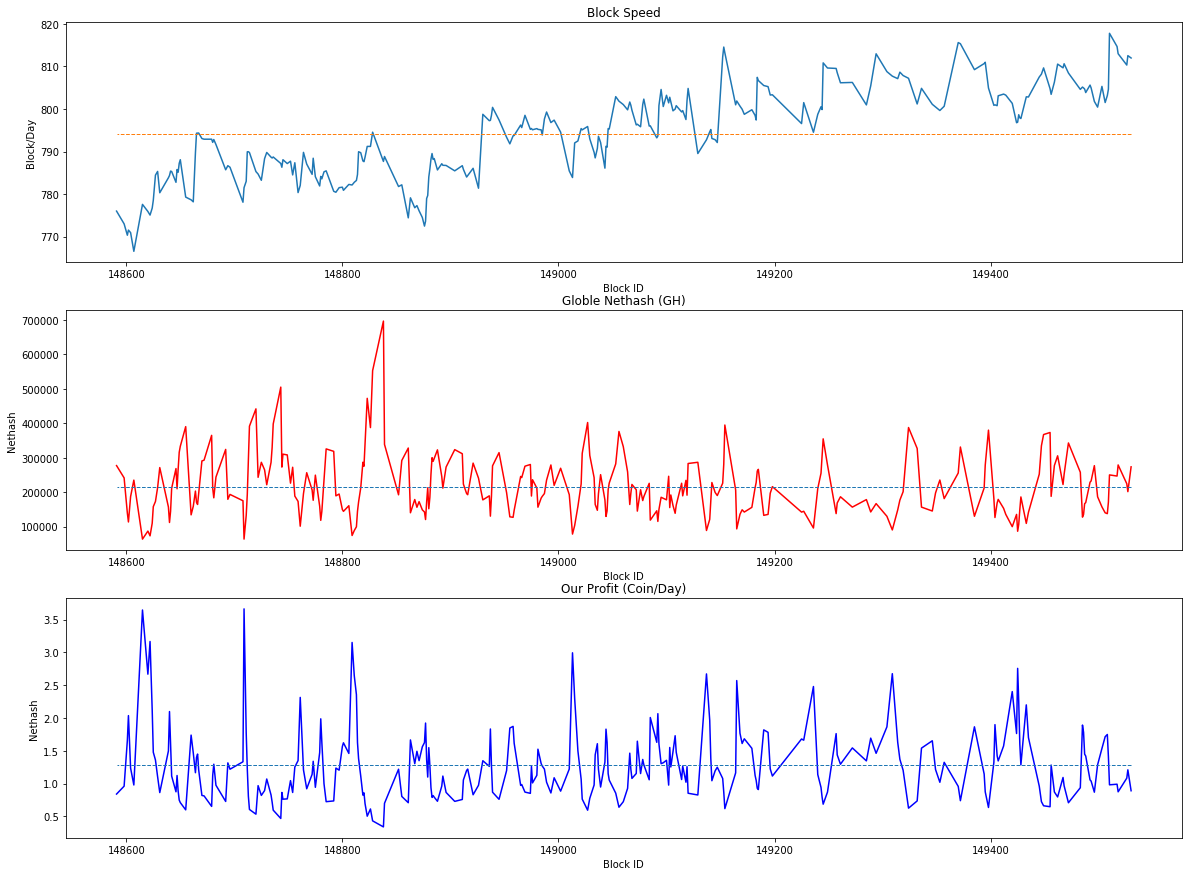

In [36]:
fig = plt.figure(figsize=(20,15))
plt.subplot(3, 1, 1)
plt.plot(df_pow_nethash_block_profit['height'], df_pow_nethash_block_profit['block_per_day'])
plt.plot(df_pow_nethash_block_profit['height'], 
         [np.mean(df_pow_nethash_block_profit['block_per_day'])]*df_pow_nethash_block_profit['height'].count(), 
         linestyle = '--', linewidth = 1)

plt.title('Block Speed')
plt.xlabel('Block ID')
plt.ylabel('Block/Day')

plt.subplot(3, 1, 2)
plt.plot(df_pow_nethash_block_profit['height'], df_pow_nethash_block_profit['nethash'], color='red')
plt.plot(df_pow_nethash_block_profit['height'], 
         [np.mean(df_pow_nethash_block_profit['nethash'])]*df_pow_nethash_block_profit['height'].count(), 
         linestyle = '--', linewidth = 1)
plt.title('Globle Nethash (GH)')
plt.xlabel('Block ID')
plt.ylabel('Nethash')

plt.subplot(3, 1, 3)
plt.plot(df_pow_nethash_block_profit['height'], df_pow_nethash_block_profit['profit'], color='blue')
plt.plot(df_pow_nethash_block_profit['height'], 
         [np.mean(df_pow_nethash_block_profit['profit'])]*df_pow_nethash_block_profit['height'].count(), 
         linestyle = '--', linewidth = 1)
plt.title('Our Profit (Coin/Day)')
plt.xlabel('Block ID')
plt.ylabel('Nethash')

plt.show()
